<a href="https://colab.research.google.com/github/diogoferraz/ai-mba/blob/main/fundamentus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with fundamentus python api

### Install all libraries

In [ ]:
!pip install fundamentus
!pip install plotly
!pip install yfinance
!pip install requests-cache

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.6 MB/s eta 0:00:00


### Import libraries and fetch the companies without filtering

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import fundamentus
import yfinance as fy
import matplotlib.pyplot as plt
import re # used when removing duplicate stocks
import plotly.graph_objects as go # plot table with stocks info
import requests_cache
import requests
import time, logging
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots


df = fundamentus.get_resultado()
df.index

Index(['AALR3', 'ABCB3', 'ABCB4', 'ABEV3', 'ABYA3', 'ACES3', 'ACES4', 'ADHM3',
       'AEDU11', 'AEDU3',
       ...
       'WHRL4', 'WISA3', 'WISA4', 'WIZC3', 'WLMM3', 'WLMM4', 'WMBY3', 'WSON33',
       'YDUQ3', 'ZAMP3'],
      dtype='object', name='papel', length=967)

### Create function to clean up duplicated stocks, based on initial letters

In [ ]:
def clean_dataframe(df):
    # Convert the index to a column
    df.reset_index(level=0, inplace=True)

    # Create a new column 'letters' that contains the sorted letters of each 'papel'
    df['letters'] = df['papel'].apply(lambda x: ''.join(sorted(set(re.sub(r'\d+', '', x)))))

    # Drop duplicates based on the 'letters' column
    df.drop_duplicates(subset='letters', keep='first', inplace=True)

    # Drop the 'letters' column as it's no longer needed
    df.drop(columns='letters', inplace=True)

    # Set 'papel' back as the index
    df.set_index('papel', inplace=True)

    return df

### Filtering results to get ROE greater than 0.10

In [ ]:
stock_ROE_filtered = clean_dataframe(df[ df.roe > 0.10])
stock_ROE_filtered.sort_values('roe', ascending = False, inplace = True);

stock_ROE_filtered.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
PLTO5,10.94,53.09,723708.00,0.721,0.0,0.942,3.03,57.52,-1.62,58.82,58.82,0.0125,0.0136,0.0174,13632.0000,3.87,0.0,1000.0,21227.00,0.0878
BBTG12,3.15,44.36,29554.00,0.000,0.0,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,666.2220,0.00,0.0,9000.0,0.00,0.0000
MTIG3,5.21,-11.22,-81.36,12.686,0.0,8.360,-11.54,-21.36,-9.97,-22.62,-24.76,-0.5938,-1.1309,-0.4780,7.2528,0.27,0.0,-7835380.0,-4.95,-0.2654
DUQE3,28.00,-1.58,-11.29,12.103,0.0,0.428,-0.74,-1.65,-0.57,-2.70,-2.98,-7.3292,-7.6760,-0.2821,7.1574,0.33,0.0,-6987000.0,-7.19,-0.4270
CTWR3,100.00,9.76,56.77,0.317,0.0,1.141,3.79,-10.64,-142.17,-8.91,-8.91,-0.0298,0.0325,-0.2186,5.8191,1.45,0.0,879000.0,5.52,0.0494


### Plot the stocks on Bar graphic

Text(0.5, 1.0, 'Stocks with ROE over 0.10')

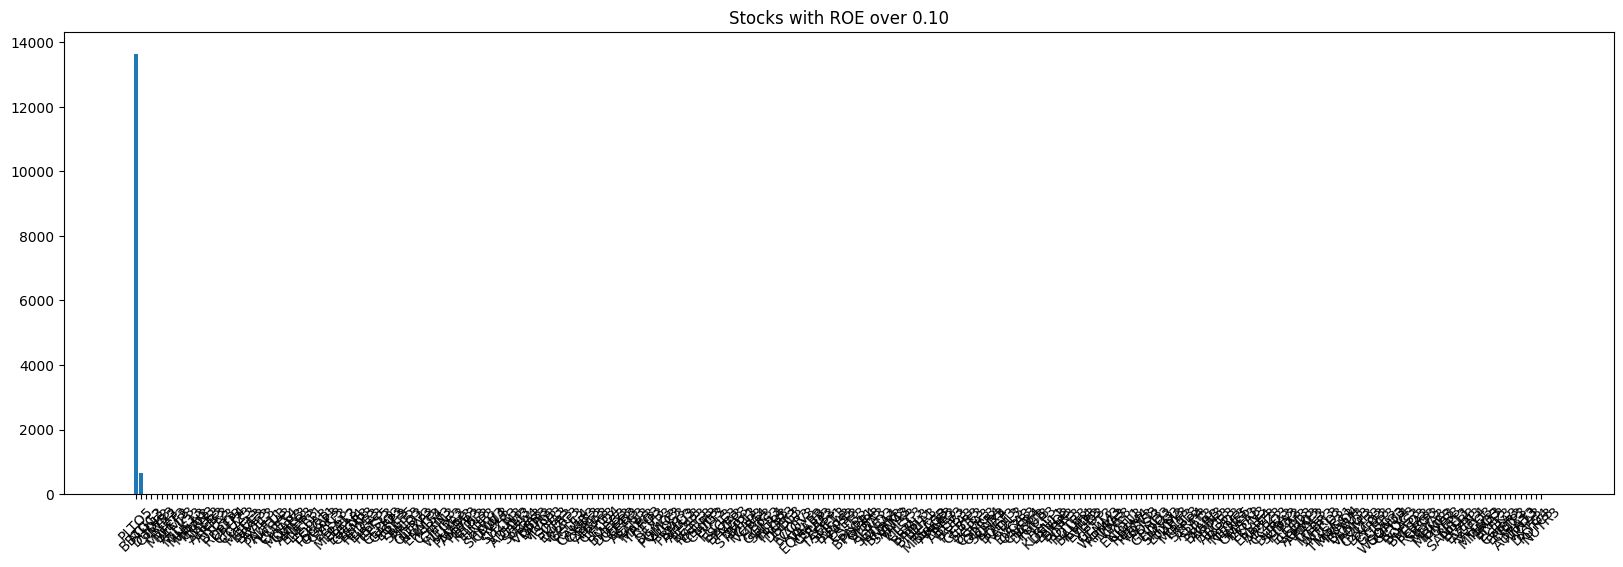

In [ ]:
plt.figure(figsize = (20,6))
plt.bar(stock_ROE_filtered.index, stock_ROE_filtered.roe)
plt.xticks(rotation = 45)
plt.title("Stocks with ROE over 0.10")

### Multi filter fundamentus dataframe

In [ ]:
stocks = clean_dataframe(df[ (df.roe > 0.10) & (df.divbpatr < 0.5)& (df.mrgliq > 0.01)])

stocks.shape
stocks.sort_values('divbpatr', ascending = False, inplace = True)
stocks.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
TASA3,12.51,10.37,1.45,0.889,0.0080,0.736,4.02,8.47,11.92,10.21,8.58,0.1049,0.0857,0.1017,0.1399,1.49,203182.0,1.091810e+09,0.48,0.1636
CCTU4,37.28,7.65,0.92,0.307,0.0000,0.405,2.29,14.56,-28.32,21.77,21.77,0.0210,0.0400,0.0296,0.1207,1.48,0.0,8.255000e+07,0.48,0.1254
FRAS3,18.00,12.88,2.64,1.434,0.0336,1.242,3.86,8.44,15.11,8.15,6.69,0.1698,0.1147,0.2373,0.2053,2.13,4317460.0,1.838190e+09,0.48,0.2741
CNFB4,5.99,9.01,1.57,1.511,0.0000,0.872,3.47,8.27,53.95,10.05,7.85,0.1827,0.1677,0.1201,0.1739,2.20,0.0,1.552470e+09,0.47,-0.1061
MULT3,23.43,13.03,1.99,6.740,0.0437,1.217,22.88,9.48,-5.48,10.82,9.91,0.7112,0.5173,0.1448,0.1524,1.48,149057000.0,7.087620e+09,0.44,0.1623


### Plot dataframe to table

In [ ]:
stocks_selected = stocks[['roe', 'divbpatr', 'mrgliq']].reset_index().sort_index(ascending=False)

headers = ['Stock', 'ROE', 'Dív. Bruta sobre o Patrimônio Líquido', 'Margem Liquida']

# Convert numerical cells to percentages
stocks_selected['roe'] = stocks_selected['roe'].apply(lambda x: f'{x*100}%')
stocks_selected['divbpatr'] = stocks_selected['divbpatr'].apply(lambda x: f'{x*100}%')
stocks_selected['mrgliq'] = stocks_selected['mrgliq'].apply(lambda x: f'{x*100}%')

table = go.Figure(data=[go.Table(
    header=dict(values=headers,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[stocks_selected[col] for col in stocks_selected.columns],
               fill_color='lavender',
               align='left'))
])
total_rows = str(len(stocks_selected))

table.update_layout(title='Filtered Stocks ' + total_rows)

table.show()

### Plot stocks to bar graph

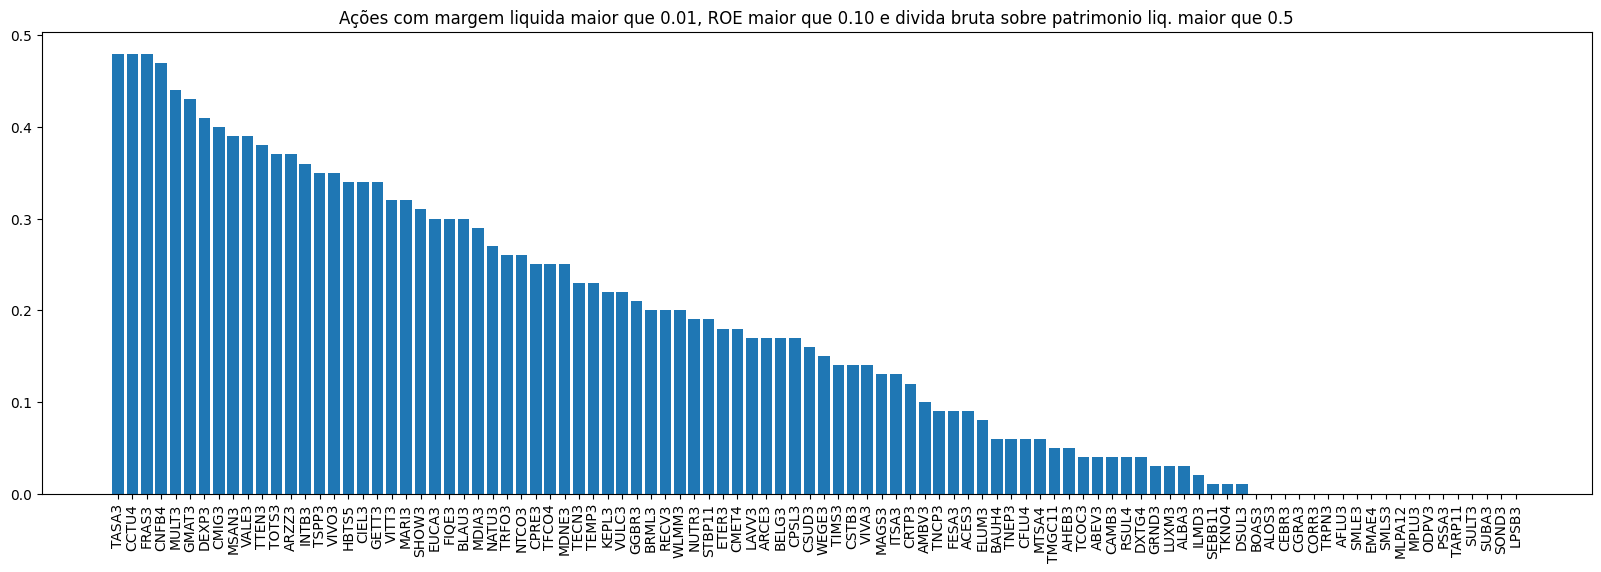

In [ ]:
plt.figure(figsize = (20,6));
plt.bar(stocks.index, stocks.divbpatr);
plt.xticks(rotation = 90);
plt.title("Ações com margem liquida maior que 0.01, ROE maior que 0.10 e divida bruta sobre patrimonio liq. maior que 0.5");

# Fundamental Analysis

Reference: https://github.com/Trading-com-Dados/tutoriais_publicos/blob/main/Aul%C3%A3o_Fundamentalista_09_10_2022.ipynb

### Instantiating new variables

In [ ]:
# first api to fetch results
resultado_raw = fundamentus.get_resultado_raw()

# second api to fetch results
resultado = fundamentus.get_resultado()

### Looking up by company setor

In [ ]:
setor = fundamentus.list_papel_setor(8)
setor

['CRFB3',
 'PCAR3',
 'VVEO3',
 'BLAU3',
 'PFRM3',
 'HYPE3',
 'GMAT3',
 'PNVL3',
 'DMVF3',
 'ASAI3',
 'RADL3',
 'PGMN3']

### Using query to filter data frame

In [ ]:
resultado_raw.query('index in @setor')


Multiples,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
papel,,,,,,,,,,,,,,,,,,,,
ASAI3,13.12,25.41,3.78,0.258,0.0000,0.425,-4.36,3.66,-0.75,6.02,4.57,0.0706,0.0102,0.77,0.1769,0.1486,153576000.0,4.698000e+09,3.40,0.2864
BLAU3,10.22,7.34,0.92,1.336,0.0305,0.600,1.51,8.30,3.70,9.21,7.83,0.1610,0.1803,4.63,0.0896,0.1248,3762370.0,2.001460e+09,0.30,0.0891
CRFB3,11.15,-29.57,1.22,0.214,0.0076,0.253,-8.43,6.33,-0.86,8.70,5.72,0.0338,-0.0058,0.94,0.0615,-0.0414,76540000.0,1.921800e+10,1.10,0.1707
DMVF3,7.81,18.50,0.45,0.226,0.0000,0.255,6.13,9.49,-1.92,9.08,2.58,0.0238,0.0122,1.16,0.0338,0.0245,1029830.0,8.708550e+08,0.03,0.1342
GMAT3,7.35,13.30,1.87,0.607,0.0059,0.993,2.65,11.41,5.83,13.14,10.52,0.0531,0.0461,2.45,0.1183,0.1408,38354800.0,8.672270e+09,0.43,0.3458
HYPE3,29.79,11.09,1.61,2.346,0.0441,0.747,4.88,7.51,-3.86,10.45,9.49,0.3126,0.2114,1.81,0.1157,0.1453,112421000.0,1.171140e+10,0.90,0.2331
PCAR3,3.18,-0.69,0.33,0.081,0.0000,0.071,1.20,1.37,-0.16,2.71,1.36,0.0592,-0.1109,1.21,0.0757,-0.4815,58555700.0,4.717000e+09,1.12,-0.2770
PFRM3,5.91,10.39,0.59,0.084,0.0653,0.148,0.67,2.98,5.21,5.37,3.34,0.0284,0.0090,1.45,0.0855,0.0564,1447350.0,1.248350e+09,0.62,0.1659
PGMN3,2.55,6773.41,0.56,0.132,0.1080,0.165,1.19,3.93,-0.81,7.09,2.96,0.0337,0.0002,1.39,0.0571,0.0001,3004100.0,2.652990e+09,0.62,0.1509


### Indicadores de Lucratividade / Operacionais
1. Margem EBIT
2. Margem Líquida
3. ROIC
4. ROE
5. Dividend Yeld
6. CAGR - Crescimento de receita dos últimos 5 anos

In [ ]:
resultado.query('index in @setor').loc[:,['mrgebit','mrgliq', 'roic', 'roe', 'dy', 'c5y']]

Multiples,mrgebit,mrgliq,roic,roe,dy,c5y
papel,,,,,,
ASAI3,0.0706,0.0102,0.1769,0.1486,0.0000,0.2864
BLAU3,0.1610,0.1803,0.0896,0.1248,0.0305,0.0891
CRFB3,0.0338,-0.0058,0.0615,-0.0414,0.0076,0.1707
DMVF3,0.0238,0.0122,0.0338,0.0245,0.0000,0.1342
GMAT3,0.0531,0.0461,0.1183,0.1408,0.0059,0.3458
HYPE3,0.3126,0.2114,0.1157,0.1453,0.0441,0.2331
PCAR3,0.0592,-0.1109,0.0757,-0.4815,0.0000,-0.2770
PFRM3,0.0284,0.0090,0.0855,0.0564,0.0653,0.1659
PGMN3,0.0337,0.0002,0.0571,0.0001,0.1080,0.1509


In [ ]:
ind_lucratividade = df.query('index in @setor').loc[:,['mrgebit','mrgliq', 'roic', 'roe', 'dy', 'c5y']]
ind_lucratividade

Multiples,mrgebit,mrgliq,roic,roe,dy,c5y
papel,,,,,,
ASAI3,0.0706,0.0102,0.1769,0.1486,0.0000,0.2864
BLAU3,0.1610,0.1803,0.0896,0.1248,0.0305,0.0891
CRFB3,0.0338,-0.0058,0.0615,-0.0414,0.0076,0.1707
DMVF3,0.0238,0.0122,0.0338,0.0245,0.0000,0.1342
GMAT3,0.0531,0.0461,0.1183,0.1408,0.0059,0.3458
HYPE3,0.3126,0.2114,0.1157,0.1453,0.0441,0.2331
PCAR3,0.0592,-0.1109,0.0757,-0.4815,0.0000,-0.2770
PFRM3,0.0284,0.0090,0.0855,0.0564,0.0653,0.1659
PGMN3,0.0337,0.0002,0.0571,0.0001,0.1080,0.1509


### Indicadores de Preço & Valor
1. P/L
2. P/VPA = Preço Ação/(PL/N ações)
3. EV/EBIT = EV - MarketCap + (div bruta - caixa)
4. EV/EBITDA

In [ ]:
ind_valor = resultado.query('index in @setor').loc[:,['pl', 'pvp', 'evebit', 'evebitda']]
ind_valor

Multiples,pl,pvp,evebit,evebitda
papel,,,,
ASAI3,25.41,3.78,6.02,4.57
BLAU3,7.34,0.92,9.21,7.83
CRFB3,-29.57,1.22,8.70,5.72
DMVF3,18.50,0.45,9.08,2.58
GMAT3,13.30,1.87,13.14,10.52
HYPE3,11.09,1.61,10.45,9.49
PCAR3,-0.69,0.33,2.71,1.36
PFRM3,10.39,0.59,5.37,3.34
PGMN3,6773.41,0.56,7.09,2.96


### Indicador de liquidez
1. Liquidez_Corrente = Ativo Circulante/Passivo Circulante

In [ ]:
ind_liquidex = resultado_raw.query('index in @setor').loc[:,['Liq. Corr.']]
ind_liquidex

Multiples,Liq. Corr.
papel,
ASAI3,0.77
BLAU3,4.63
CRFB3,0.94
DMVF3,1.16
GMAT3,2.45
HYPE3,1.81
PCAR3,1.21
PFRM3,1.45
PGMN3,1.39


### Endividamento
1. Divida Bruta/Patrimonio Liquido

In [ ]:
endividamento = resultado.query('index in @setor').loc[:,['divbpatr']]
endividamento

Multiples,divbpatr
papel,
ASAI3,3.40
BLAU3,0.30
CRFB3,1.10
DMVF3,0.03
GMAT3,0.43
HYPE3,0.90
PCAR3,1.12
PFRM3,0.62
PGMN3,0.62


### Informações da empresa


In [ ]:
ativo = fy.Ticker('RADL3.SA')
ativo.financials

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,15860938.5,893412.0,-1559174.0,-2967244.0
Tax Rate For Calcs,0.1065,0.1494,0.226,0.196
Normalized EBITDA,2526964000.0,2399359000.0,2607763000.0,2071666000.0
Total Unusual Items,179040000.0,5980000.0,-6899000.0,-15139000.0
Total Unusual Items Excluding Goodwill,148929000.0,5980000.0,-6899000.0,-15139000.0
Net Income From Continuing Operation Net Minority Interest,1054973000.0,996112000.0,751934000.0,484444000.0
Reconciled Depreciation,797690000.0,700166000.0,1327110000.0,1177282000.0
Reconciled Cost Of Revenue,23766426000.0,20257912000.0,16920834000.0,14175708000.0
EBITDA,2706004000.0,2405339000.0,2600864000.0,2056527000.0
EBIT,1908314000.0,1705173000.0,1273754000.0,879245000.0


### DRE da empresa

In [ ]:
#Campos confiáveis para esse ativo
#Net Income - Lucro Líquido
#Income Before Tax - Lucro antes do imposto de renda
#Selling General Administrative (SG&A) Despesas Operacionais
#Gross Profit - Lucro Bruto
#Income Tax Expense - Lucro antes do imposto de renda
#Total Revenue - Total de Receita
#Cost Of Revenue - Custo da Receita
dre = pd.DataFrame(ativo.get_financials(freq='quarterly'))
dre = dre/1000
dre = dre[dre.columns[::-1]]
dre

,2023-03-31,2023-06-30,2023-09-30,2023-12-31
TaxEffectOfUnusualItems,103.5762,4221.054451,5452.84547,3986.135897
TaxRateForCalcs,0.000027,0.000176,0.000112,0.000058
NormalizedEBITDA,750868.0,987977.0,871769.0,375038.0
TotalUnusualItems,3822.0,23985.0,48884.0,98932.0
TotalUnusualItemsExcludingGoodwill,3822.0,23985.0,48884.0,68821.0
NetIncomeFromContinuingOperationNetMinorityInterest,192260.0,338188.0,263685.0,260841.0
ReconciledDepreciation,406557.0,424960.0,451098.0,-484925.0
ReconciledCostOfRevenue,5609602.0,5832248.0,6085664.0,6238912.0
EBITDA,754690.0,1011962.0,920653.0,473970.0
EBIT,348133.0,587002.0,469555.0,473970.0


### Balanço da empresa

In [ ]:
#Total Assets - Total do ativo
#Total Stockholder Equity - Patrimônio Líquido
bal = ativo.get_balance_sheet(freq='yearly')

balanco = pd.DataFrame(bal)
balanco = balanco/1000
balanco = balanco[balanco.columns[::-1]]
balanco

,2020-12-31,2021-12-31,2022-12-31,2023-12-31
TreasurySharesNumber,2578.659,4961.19,4347.004,3624.842
OrdinarySharesNumber,1715428.54,1713046.01,1713660.195,1714382.358
ShareIssued,1718007.199,1718007.2,1718007.199,1718007.2
NetDebt,773097.0,1149104.0,1884363.0,2718382.0
TotalDebt,5084379.0,5178120.0,6057912.0,7067464.0
...,...,...,...,...
GrossAccountsReceivable,1559908.0,1727115.0,2325300.0,3120350.0
CashCashEquivalentsAndShortTermInvestments,880357.0,356118.0,433541.0,412321.0
CashAndCashEquivalents,880357.0,356118.0,433541.0,412321.0
CashEquivalents,763190.0,214986.0,315072.0,234746.0


### Plot Graph for Avaliação Fundamentalista RADL3.SA

In [ ]:
fig = make_subplots(rows=8,
                    cols=2,
                    row_heights=[5,5,5,5,5,5,5,5],
                    column_widths=[3,3],
                    subplot_titles=('Receita Bruta Y', 'Lucro Líquido Y', 'Dívida CP Tri', 'Dívida LP Tri',
                                    'Margem EBITDA', 'Margem Líquida', 'ROIC', 'ROE',
                                    'Div Bruta/PL', 'CAGR 5Y', 'Preço/Lucro', 'P/VP',
                                    'EV/EBIT', 'EV/EBITDA', 'Liquidez Corrente', 'Div Yeld'),
                    shared_xaxes=False)
fig.add_trace(go.Bar(name='Receita_bruta', x=receitas.index, y=receitas['Revenue']), row=1, col=1)
fig.add_trace(go.Bar(name='Receita_liquida', x=receitas.index, y=receitas['Earnings']), row=1, col=2)

fig.add_trace(go.Bar(name='Divida_CP', x=balanco.columns, y=balanco.loc['ShortLongTermDebt']), row=2, col=1)
fig.add_trace(go.Bar(name='Divida_CP', x=balanco.columns, y=balanco.loc['LongTermDebt']), row=2, col=2)

fig.add_trace(go.Bar(name='Margem_Ebtida', x=ind_luc.index, y=ind_luc['mrgebit']), row=3, col=1)
fig.add_trace(go.Bar(name='Margem_Liquida', x=ind_luc.index, y=ind_luc['mrgliq']), row=3, col=2)
fig.add_trace(go.Bar(name='ROIC', x=ind_luc.index, y=ind_luc['roic']), row=4, col=1)
fig.add_trace(go.Bar(name='ROE', x=ind_luc.index, y=ind_luc['roe']), row=4, col=2)

fig.add_trace(go.Bar(name='divbpatr', x=end.index, y=end['divbpatr']), row=5, col=1)
fig.add_trace(go.Bar(name='c5y', x=ind_luc.index, y=ind_luc['c5y']), row=5, col=2)
fig.add_trace(go.Bar(name='pl', x=ind_valor.index, y=ind_valor['pl']), row=6, col=1)
fig.add_trace(go.Bar(name='pvp', x=ind_valor.index, y=ind_valor['pvp']), row=6, col=2)
fig.add_trace(go.Bar(name='evebit', x=ind_valor.index, y=ind_valor['evebit']), row=7, col=1)
fig.add_trace(go.Bar(name='evebitda', x=ind_valor.index, y=ind_valor['evebitda']), row=7, col=2)
fig.add_trace(go.Bar(name='ind_liq', x=ind_liq.index, y=ind_liq['Liq. Corr.']), row=8, col=1)
fig.add_trace(go.Bar(name='dy', x=ind_luc.index, y=ind_luc['dy']), row=8, col=2)
fig.update_layout(title_text='Avaliação Fundamentalista RADL3.SA',
                  template='plotly_dark',#template pré-definido da plotly
                  showlegend=False, #esconder ou mostrar legenda
                  height=1800, #altura
                  width=900) #largura
fig.show()

NameError: name 'receitas' is not defined

### Cálculo do Giro do Ativo e Margem Líquida através do YF


In [ ]:
dre_a = ativo.get_financials(freq='yearly')
dre_a = pd.DataFrame(dre_a)
dre_a = dre_a/1000
dre_a = dre_a[dre_a.columns[::-1]]
dre_a


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
TaxEffectOfUnusualItems,-2967.244,-1559.174,893.412,15860.9385
TaxRateForCalcs,0.000196,0.000226,0.000149,0.000107
NormalizedEBITDA,2071666.0,2607763.0,2399359.0,2526964.0
TotalUnusualItems,-15139.0,-6899.0,5980.0,179040.0
TotalUnusualItemsExcludingGoodwill,-15139.0,-6899.0,5980.0,148929.0
NetIncomeFromContinuingOperationNetMinorityInterest,484444.0,751934.0,996112.0,1054973.0
ReconciledDepreciation,1177282.0,1327110.0,700166.0,797690.0
ReconciledCostOfRevenue,14175708.0,16920834.0,20257912.0,23766426.0
EBITDA,2056527.0,2600864.0,2405339.0,2706004.0
EBIT,879245.0,1273754.0,1705173.0,1908314.0


In [ ]:
giro_do_ativo = pd.DataFrame()
giro_do_ativo['Giro_do_Ativo'] = dre_a.loc['TotalRevenue'] /balanco.loc['TotalAssets']
giro_do_ativo

,Giro_do_Ativo
2020-12-31,1.451165
2021-12-31,1.632905
2022-12-31,1.691409
2023-12-31,1.690708


### Margem Líquida - Anual

In [ ]:
margem_liquida = pd.DataFrame()
margem_liquida['Margem_Liquida'] = dre_a.loc['NetIncome'] /dre_a.loc['TotalRevenue']
margem_liquida

,Margem_Liquida
2020-12-31,0.024142
2021-12-31,0.031166
2022-12-31,0.034269
2023-12-31,0.031053
